# Line plots

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import uuid
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format='retina' # Useful for running matplotlib on high-dpi displays

plt.rcParams["figure.figsize"] = (7.5, 6)
plt.rcParams['text.usetex'] = True
plt.rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
plt.rcParams.update({'font.size': 17})

def set_basics(title, axes, markzero = False):
    fig, ax = plt.subplots()
    plt.title(title)
    if markzero:
        plt.axhline(y=0, color='grey', linestyle='--', linewidth=1)
    ax.set_xlabel(axes[0])
    ax.set_ylabel(axes[1])
    return fig, ax

def lineplot(x, y, axes, title, markzero = False):
    fig, ax = set_basics(title, axes, markzero)
    ax.plot(x,y)

def comparison_lineplot(x, ys, prelabel, labels, axes, title, markzero = False):
    fig, ax = set_basics(title, axes, markzero)
    for i in range(len(ys)):
        ax.plot(x[i],ys[i],label=prelabel + r' %1.3f'%(labels[i]))
    ax.legend(fancybox=True, shadow=True)
    plt.legend(frameon = 1).get_frame().set_edgecolor('black')
    
# Scientific notation: plt.ti- (r^n*(r^(n + 1)/tau - 1)*(n + 1))/(mu0*tau) - (r^(m + 1)*(r^(m + 1)/(Cnm*tau) + (r*r^m*(m + 1))/(Cnm*tau)))/(Cnm*mu0*r*tau)- (r^n*(r^(n + 1)/tau - 1)*(n + 1))/(mu0*tau) - (r^(m + 1)*(r^(m + 1)/(Cnm*tau) + (r*r^m*(m + 1))/(Cnm*tau)))/(Cnm*mu0*r*tau)cklabel_format(axis='y', style='sci', scilimits=(-4,-4))
# Save figure: plt.savefig(str(uuid.uuid4()), format="png", dpi=1200)

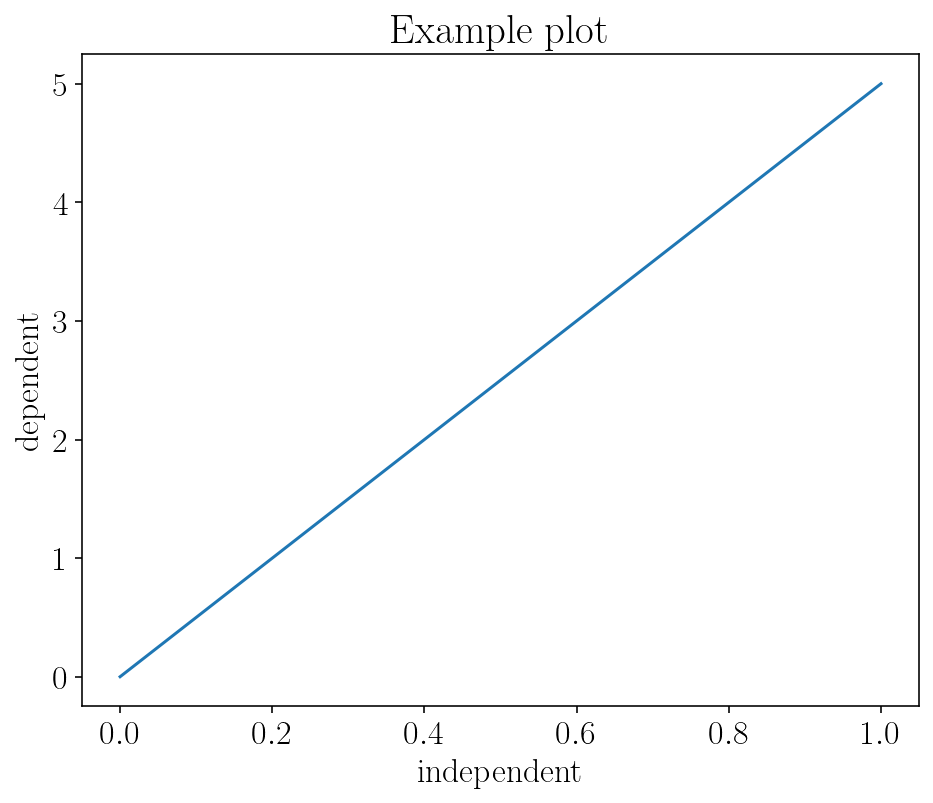

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


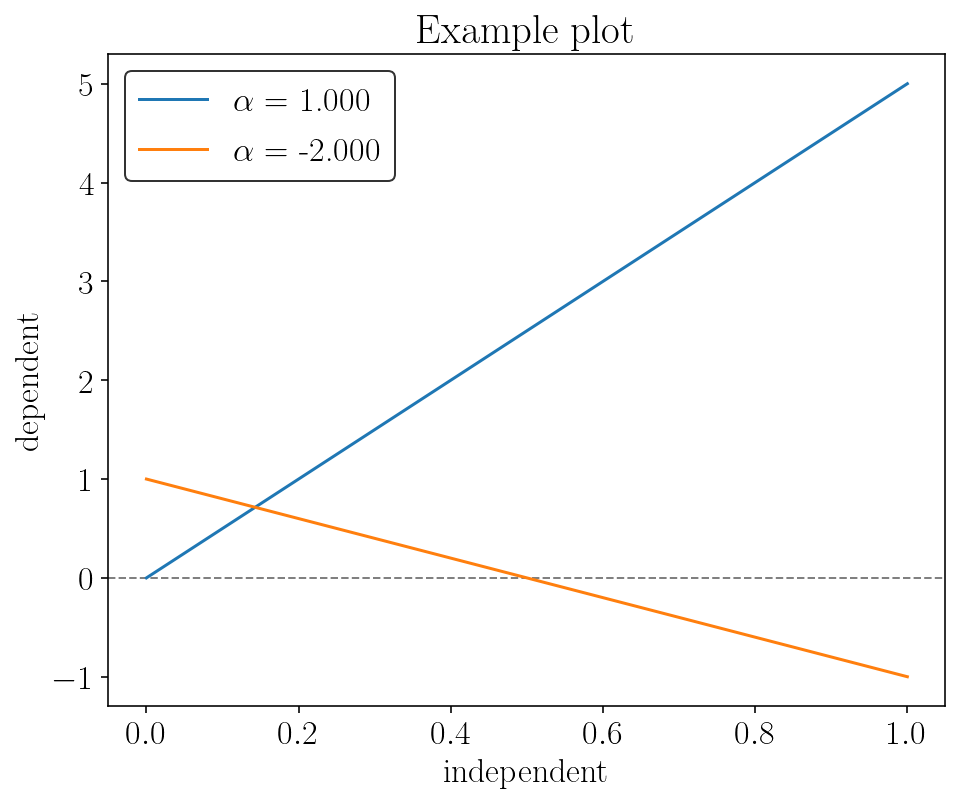

In [2]:
m = 1
# Demonstration
x = np.linspace(0,1)
y1 = 5*x
y2 = -2*x+1
labels = [1, -2]
prelabel = r'$\alpha$ = ' 
axes = ['independent', 'dependent']
title = 'Example plot'

lineplot(x, y1, axes, title)
comparison_lineplot([x,x], [y1,y2], prelabel, labels, axes, title, markzero = True)

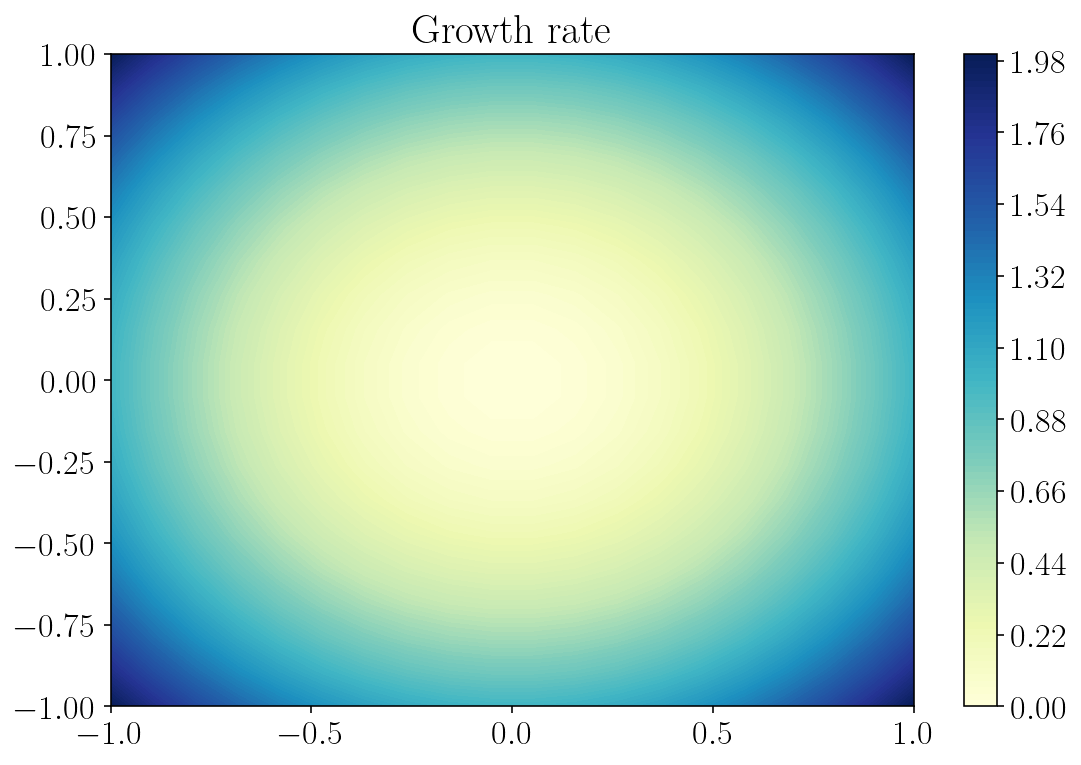

In [116]:
def colorplot(x,y,Z): 
    plt.rcParams["figure.figsize"] = (9, 6)
    # x,y,Z are turned from lists to numpy arrays.
    x = np.array(x)
    y = np.array(y)
    Z = np.array(Z)
    X, Y = np.meshgrid(x, y)
    plt.contourf(X, Y, Z, 100, cmap=plt.get_cmap('YlGnBu')) # Also: 'gnuplot2'. Find others.
    plt.colorbar()
    plt.title('Growth rate')
    #plt.savefig(str(uuid.uuid4()))
    plt.show()
    # All possible contours here.
    # https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html

# Demonstration
N = 20
x = np.linspace(-1,1,N)
y = np.linspace(-1,1,N)
Z = np.empty((N, N))
for i in range(N):
    for j in range(N):
        Z[i][j] = x[i]**2 + y[j]**2
colorplot(x,y,Z)

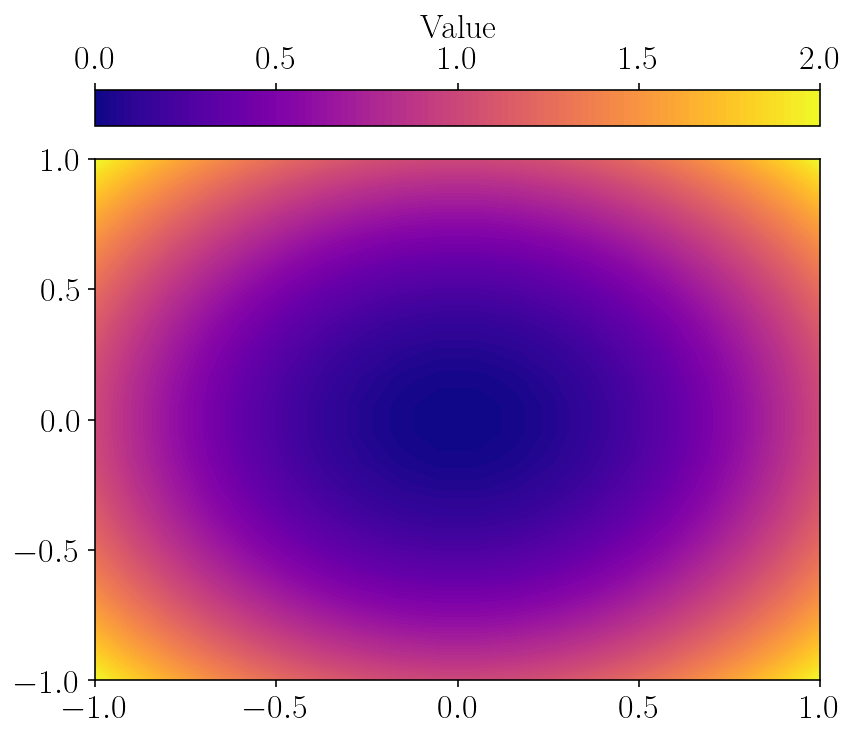

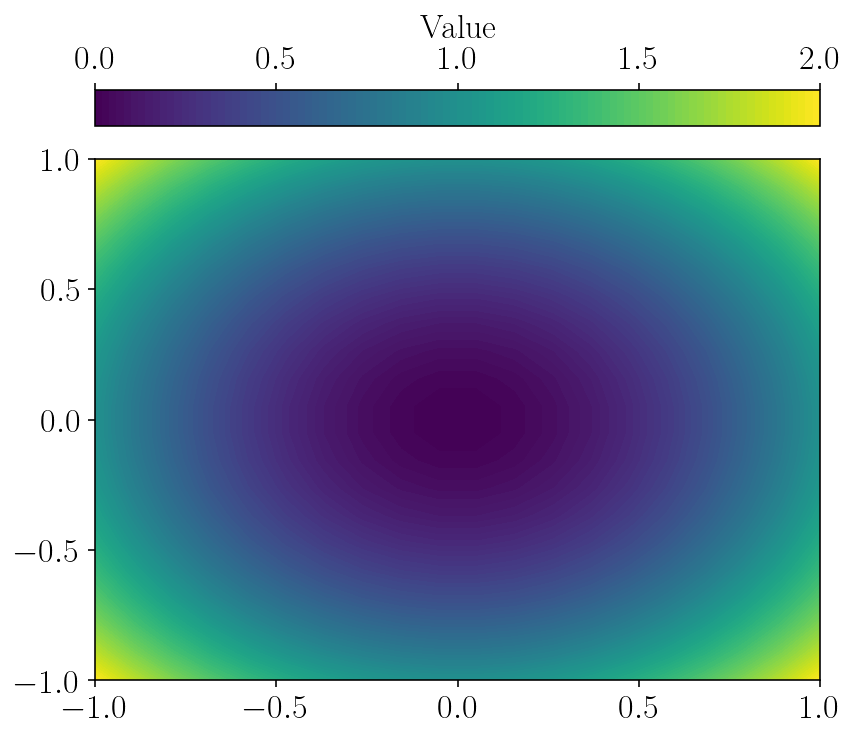

In [254]:
def colorplot(x,y,Z,label,cmap): 
    fig, ax = plt.subplots()
    plt.rcParams["figure.figsize"] = (6.5, 6)
    # x,y,Z are turned from lists to numpy arrays.
    x = np.array(x)
    y = np.array(y)
    Z = np.array(Z)
    X, Y = np.meshgrid(x, y)
    im = plt.contourf(X, Y, Z, 100, cmap=plt.get_cmap(cmap))
    ticks = [0, np.max(Z)/4, np.max(Z)/2, np.max(Z)*3/4, np.max(Z)]
    ticks = [round(i,1) for i in ticks]
    cb = plt.colorbar(im , ax = [ax], location = 'top', label=label)
    cb.set_ticks(ticks)
    plt.show()
    #plt.savefig(str(uuid.uuid4()))

# All possible contours here.
# https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html

# Demonstration
N = 20
x = np.linspace(-1,1,N)
y = np.linspace(-1,1,N)
Z = np.empty((N, N))
for i in range(N):
    for j in range(N):
        Z[i][j] = x[j]**2 + y[i]**2
label = 'Value'
cmap = 'plasma'
colorplot(x,y,Z,label,cmap)
cmap = 'viridis'
colorplot(x,y,Z,label,cmap)

In [7]:
from mag_field import Bz, Btheta, dBz, dBtheta
from mag_field_Teresa import TBz, TBtheta, TdBz, TdBtheta

def Twist(a, q, r):
    return q*r**(a-1)

def Lorentz(a, q, r, mu0 = 1):
    return (2*q**2*r)/(mu0*(q**2*r**2 + 1)**3) - (q*r**a*((q*r**a)/(q**2*r**2 + 1) - (2*q**3*r**a*r**2)/(q**2*r**2 + 1)**2 + (a*q*r*r**(a - 1))/(q**2*r**2 + 1)))/(mu0*r*(q**2*r**2 + 1))

def avg(f, param1, param2):
    rr = np.linspace(0.01,1,100)
    return np.mean(2*np.multiply(rr, np.abs(f(param1, param2, rr))))

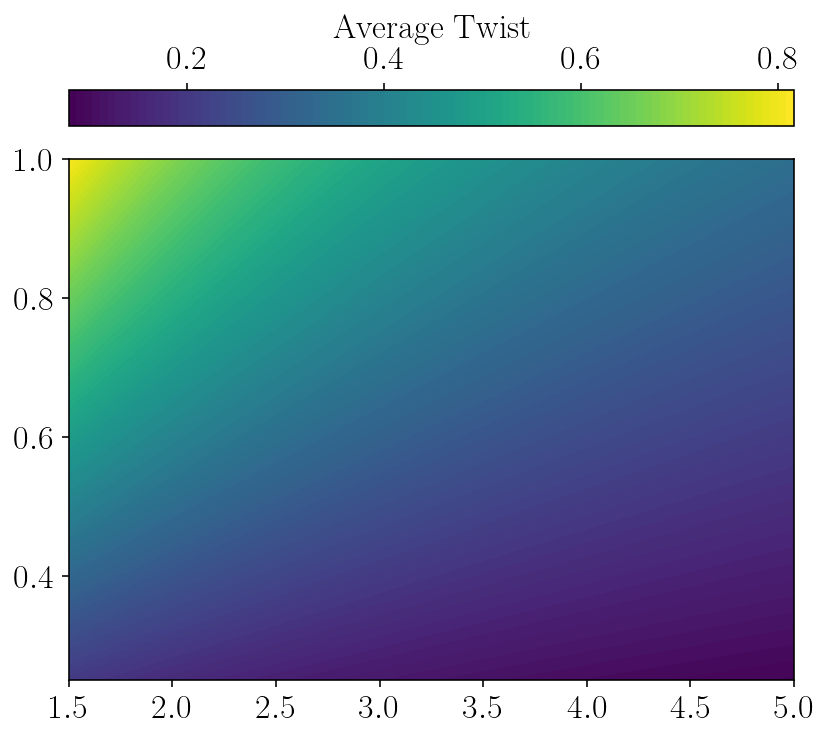

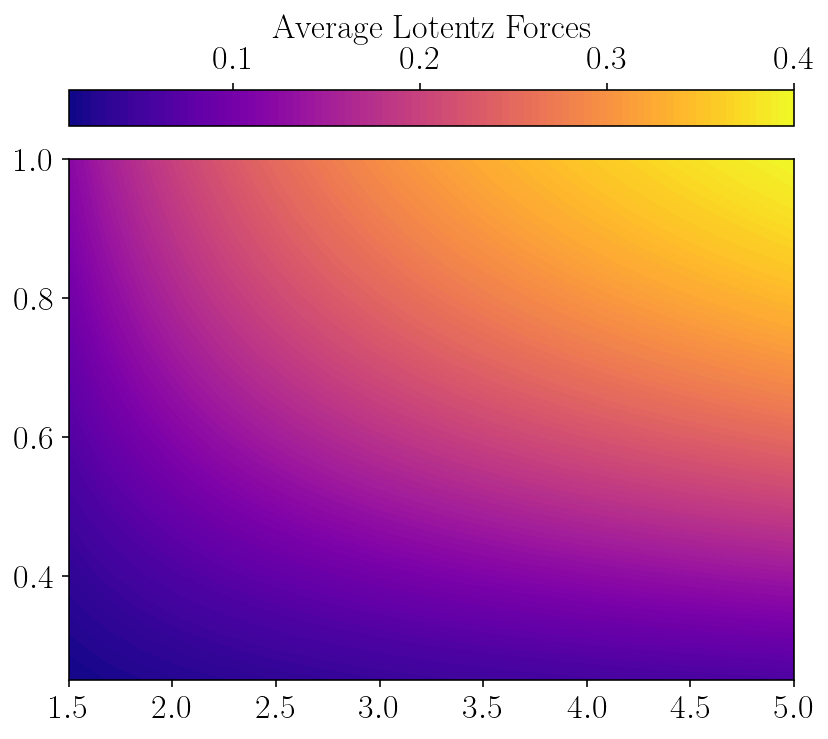

In [256]:
# For GH Modified model:

N = 20
rr = np.linspace(0,1,100)
a = np.linspace(1.5,5,N)
q = np.linspace(0.25,1,N)

Z = np.empty((N, N))
for i in range(N):
    for j in range(N):
        Z[i][j] = avg(Twist, a[j], q[i])
label = 'Average Twist'
cmap = 'viridis'
colorplot(a,q,Z,label,cmap)

Z = np.empty((N, N))
for i in range(N):
    for j in range(N):
        Z[i][j] = avg(Lorentz, a[j], q[i])
label = 'Average Lotentz Forces'
cmap = 'plasma'
colorplot(a,q,Z,label,cmap)

# Plot twist (QR) and Lorentz forces when varying alpha.

In [60]:
plt.rcParams["figure.figsize"] = (6.5, 6)

def comparison_lineplot(x, ys, prelabel, labels, axes, title, markzero = False):
    fig, ax = set_basics(title, axes, markzero)
    colors = np.linspace(0.2, 0.7, len(ys))
    for i in range(len(ys)):
        ax.plot(x[i],ys[i],label=prelabel + r' %1.1f'%(labels[i]), color = plt.cm.cool(colors[i]), lw = 2)
    ax.legend(fancybox=True, shadow=True)
    plt.legend(frameon = 1).get_frame().set_edgecolor('black')
    #plt.savefig(str(uuid.uuid4())+'.png', format="png", dpi=1200, pad_inches=-1)

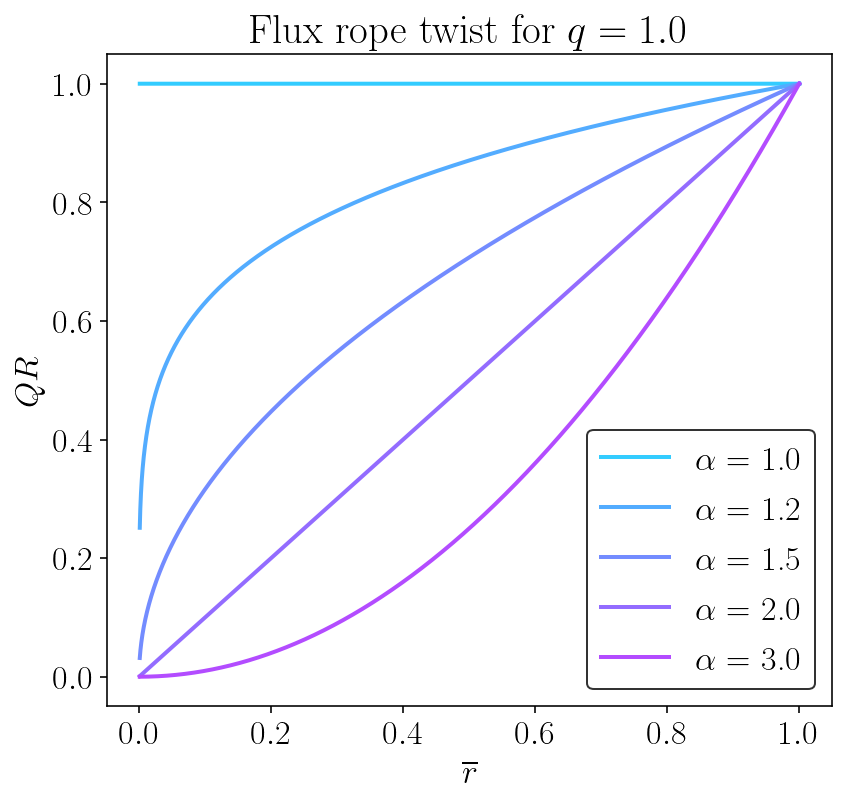

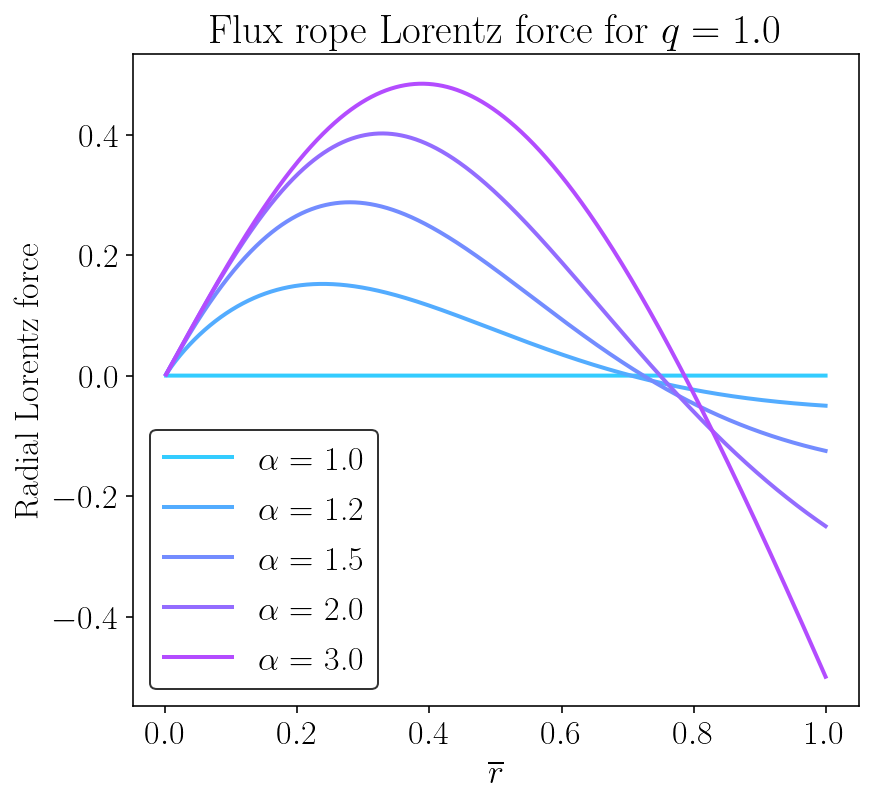

In [61]:
N = 10000
rr = np.linspace(0.001,1,N)

q = 1
alphas = [1.0,1.2,1.5,2.0,3.0]
rdata = [rr, rr, rr, rr, rr]
qdata = []
forcedata = []
for alpha in alphas:
    qdata.append(Twist(alpha, q, rr)) 
    forcedata.append(Lorentz(alpha, q, rr))
prelabel = r'$\alpha$ = '
labels = alphas

axes = ['$\overline{r}$', '$QR$']
title = 'Flux rope twist for $q = 1.0$'
comparison_lineplot(rdata, qdata, prelabel, labels, axes, title)

axes = ['$\overline{r}$', 'Radial Lorentz force']
title = 'Flux rope Lorentz force for $q = 1.0$'
comparison_lineplot(rdata, forcedata, prelabel, labels, axes, title)

# Teresa: not working but not needed

In [199]:
n_NC = 0
m_NC = 1
# - (r^n*(r^(n + 1)/tau - 1)*(n + 1))/(mu0*tau) - (r^(m + 1)*(r^(m + 1)/(Cnm*tau) + (r*r^m*(m + 1))/(Cnm*tau)))/(Cnm*mu0*r*tau)
def LorentzNC(Cnm, tau, r):
    return - (r**n_NC*(r**(n_NC + 1)/tau - 1)*(n_NC + 1))/(mu0*tau) - (r**(m_NC + 1)*(r**(m_NC + 1)/(Cnm*tau) + (r*r**m_NC*(m_NC + 1))/(Cnm*tau)))/(Cnm*mu0*r*tau)
    
def TwistNC(Cnm, tau, r):
    return r**m_NC/(Cnm*(tau-r**(n_NC+1)))

# Stability curve obtained by Florido-Llinas et. al. 2020

def parameters(n_NC, m_NC):
    gamma = 1; beta = 0.84; eta = 5.7;
    nm = [n_NC,m]
    if nm == [1,0]:
        rho = 5.6382
    elif nm == [2,1]:
        rho = 4.7935
    elif nm == [3,2]:
        rho = 4.3101
    elif nm == [1,1]:
        beta = 0.8032
        eta = 5.8
        rho = 6.1000
    else:
        print("Nieves-Chinchilla n,m parameters not supported.")
    return gamma, beta, eta, rho

def Cnm_threshold(tau):
    [gamma, beta, eta, rho] = parameters(n_NC, m_NC)
    return (rho*beta/eta)*((tau - gamma)/eta)**(beta - 1)*exp(-((tau - gamma)/eta)**beta);

<ipython-input-199-ed0953af5e66>:8: RuntimeWarning: divide by zero encountered in true_divide
  return r**m_NC/(Cnm*(tau-r**(n_NC+1)))


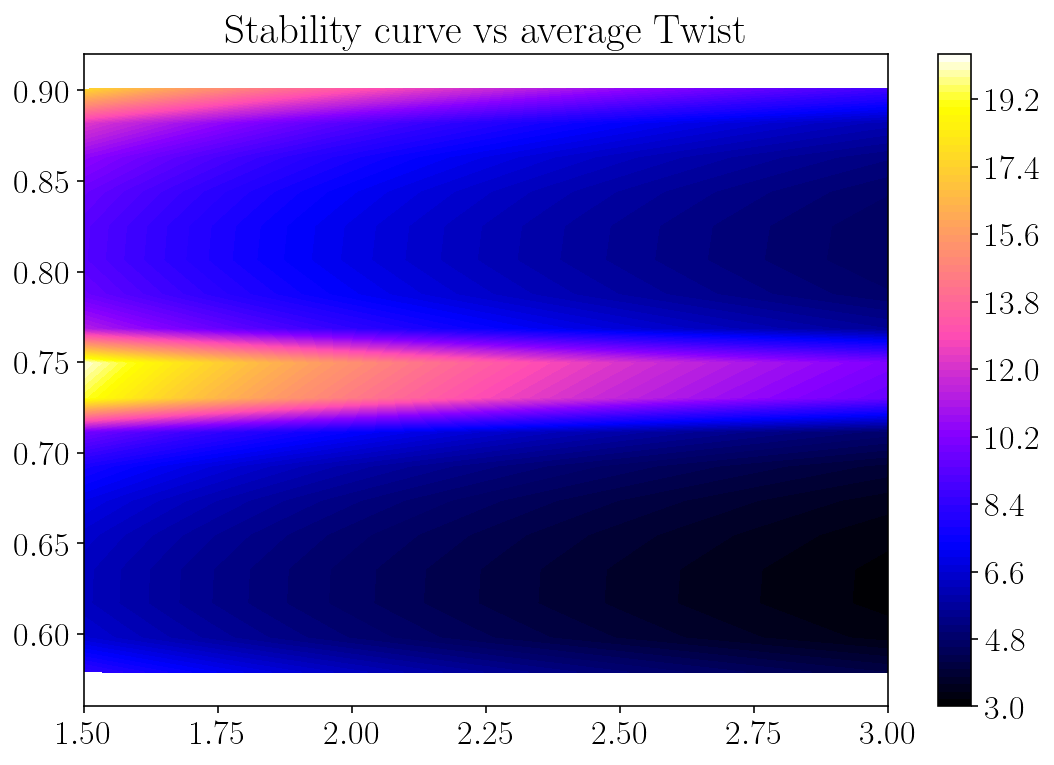

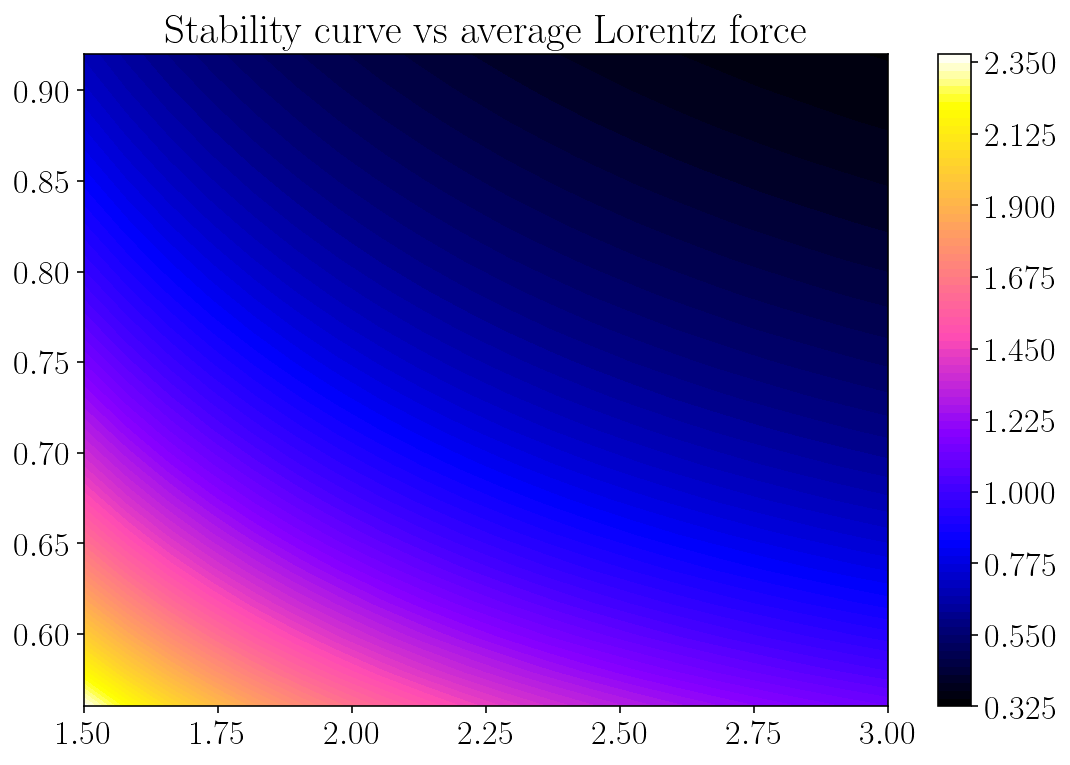

In [200]:
# For Teresa's model:
# IT DOES NOT WORK FOR NOW, IT DOES NOT SEEM TOO CRUCIAL FOR MY WORK TBH... I CAN JUST SAY IT.

N = 20
rr = np.linspace(0.01,1,100)
tau = np.linspace(1.5,3,N)
Cnm = np.linspace(0.56,0.92,N)

Z = np.empty((N, N))
for i in range(N):
    for j in range(N):
        Z[i][j] = avg(TwistNC, tau[j], Cnm[i])
title = 'Stability curve vs average Twist'
colorplot(tau,Cnm,Z,title)

Z = np.empty((N, N))
for i in range(N):
    for j in range(N):
        Z[i][j] = avg(LorentzNC, tau[j], Cnm[i])
title = 'Stability curve vs average Lorentz force'
colorplot(tau,Cnm,Z,title)